# 🚗 Tunisia Cars Price Prediction
## Multiple Linear Regression Model

**Project Goal:** Predict used car prices in Tunisia using Multiple Linear Regression

**Dataset:** 60,000 cars across 24 governorates with 23 brands

**Team Members:**
- Khalil Amamri
- Montassar Zreilli
- Wassim Mnassri
- Mahdi Hadj Amor

In [51]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

---
## 📊 1. Data Loading & Inspection

In [52]:
# Load Dataset
df = pd.read_csv('../data/raw/tunisia_cars_dataset.csv')
print(f'Dataset shape: {df.shape}')
display(df.head())

Dataset shape: (60000, 23)


,brand,model,year,mileage,fuel,gearbox,vehicle_condition,car_body,horsepower,engine_size,number_of_owners,accident_history,import_or_local,location,color,air_conditioning,parking_sensor,rear_camera,sunroof,alloy_wheels,bluetooth,gps,price
0,Skoda,Octavia,2013,109951.0,Essence,Manuelle,tres bon etat,SUV,202.0,2.6,1,0,local,Sidi Bouzid,noir,0,0,1,0,1,1,0,21611
1,Seat,Leon,2014,140294.0,Essence,Manuelle,tres bon etat,berline,169.0,2.0,2,0,local,Tozeur,vert,0,0,0,1,0,0,1,17296
2,Dacia,Dokker,2024,11848.0,Essence,Automatique,excellent,SUV,172.0,2.3,1,0,local,Siliana,rouge,1,1,1,0,0,0,1,20808
3,Hyundai,i20,2017,105169.0,Hybride,Manuelle,excellent,citadine,88.0,1.2,1,0,local,Medenine,rouge,0,0,0,0,1,0,0,22223
4,Renault,Duster,2016,150312.0,Essence,Manuelle,moyen,citadine,60.0,0.9,1,0,imported,Tataouine,bleu,0,0,0,0,1,1,1,15886


---
## 🔍 2. Exploratory Data Analysis (EDA)

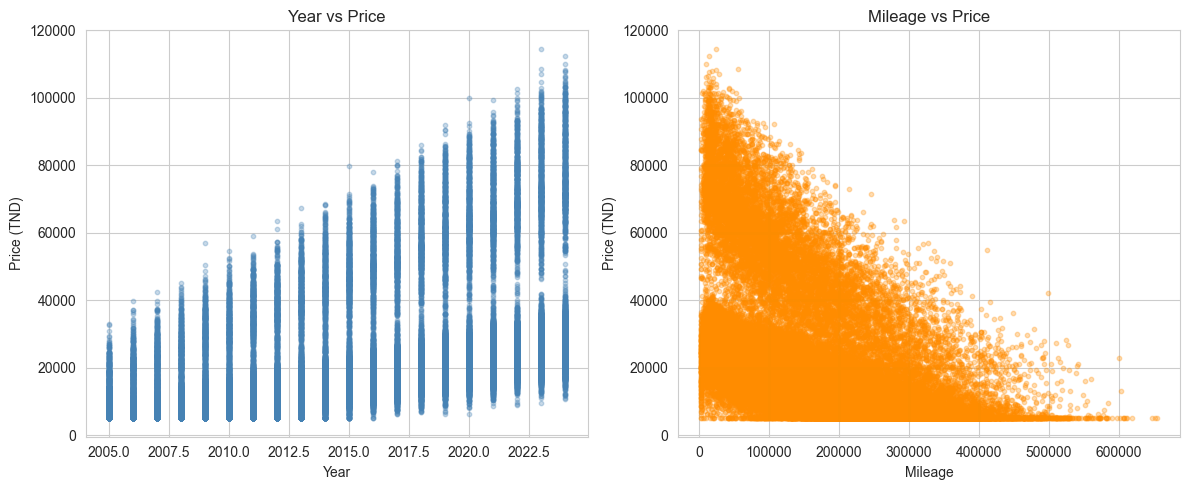

In [53]:
# Simple Scatter Plots (Pre-Processing)
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].scatter(df['year'], df['price'], alpha=0.3, s=10, color='steelblue')
axes[0].set_xlabel('Year'); axes[0].set_ylabel('Price (TND)'); axes[0].set_title('Year vs Price')

axes[1].scatter(df['mileage'], df['price'], alpha=0.3, s=10, color='darkorange')
axes[1].set_xlabel('Mileage'); axes[1].set_ylabel('Price (TND)'); axes[1].set_title('Mileage vs Price')

plt.tight_layout(); plt.show()

---
## 🧹 3. Data Cleaning & Missing Values

In [54]:
# Handle Missing Values
print("Missing values per column before handling:")
print(df.isna().sum())

# Define raw numeric and categorical columns
numeric_cols_raw = ['year','mileage','horsepower','engine_size','number_of_owners','accident_history','price']
cat_cols_raw = ['brand','model','fuel','gearbox','vehicle_condition','car_body','import_or_local','location','color']

# Fill numeric NaNs with median
for c in numeric_cols_raw:
    if c in df.columns:
        df[c] = df[c].fillna(df[c].median())

# Drop rows with missing categorical values
df_before = len(df)
df = df.dropna(subset=[c for c in cat_cols_raw if c in df.columns])
print(f"\nDropped {df_before - len(df)} rows with missing categorical values.")

print("\nMissing values per column after handling:")
print(df.isna().sum())

Missing values per column before handling:
brand                0
model                0
year                 0
mileage              5
fuel                 0
gearbox              0
vehicle_condition    0
car_body             0
horsepower           4
engine_size          0
number_of_owners     0
accident_history     0
import_or_local      0
location             0
color                0
air_conditioning     0
parking_sensor       0
rear_camera          0
sunroof              0
alloy_wheels         0
bluetooth            0
gps                  0
price                0
dtype: int64

Dropped 0 rows with missing categorical values.

Missing values per column after handling:
brand                0
model                0
year                 0
mileage              0
fuel                 0
gearbox              0
vehicle_condition    0
car_body             0
horsepower           0
engine_size          0
number_of_owners     0
accident_history     0
import_or_local      0
location             0
c

---
## ⚙️ 4. Feature Engineering & Encoding

In [55]:
# Feature Engineering
categorical_cols = ['brand','model','fuel','gearbox','vehicle_condition','car_body','import_or_local','location','color']

# Create engineered features
df['age'] = 2025 - df['year']
df['mileage_per_year'] = df['mileage'] / df['age'].replace(0,1)

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']
print(f'Features: {X.shape} | Target: {y.shape}')

Features: (60000, 178) | Target: (60000,)


---
## 🤖 5. Model Training

In [56]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_test = lin_reg.predict(X_test_scaled)
y_pred_test = np.maximum(y_pred_test, 0)  # Ensure no negative prices

print('✓ Model trained successfully')

✓ Model trained successfully


---
## 📈 6. Model Evaluation & Results

MODEL PERFORMANCE
R² Score:  0.8991  (variance explained)
MAE:       3,876 TND  (Average error)


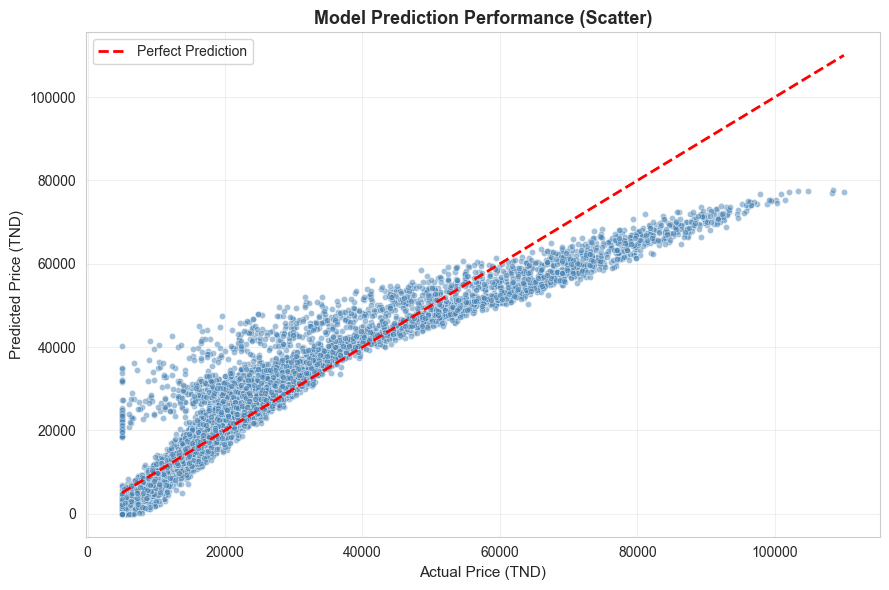

In [57]:
# Calculate performance metrics (no RMSE)
r2_test = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Display results
print('='*50)
print('MODEL PERFORMANCE')
print('='*50)
print(f'R² Score:  {r2_test:.4f}  (variance explained)')
print(f'MAE:       {mae:,.0f} TND  (Average error)')
print('='*50)

# Visualization: Actual vs Predicted (Scatter)
plt.figure(figsize=(9,6))
plt.scatter(y_test, y_pred_test, alpha=0.5, s=20, color='steelblue', edgecolor='white', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price (TND)', fontsize=11)
plt.ylabel('Predicted Price (TND)', fontsize=11)
plt.title('Model Prediction Performance (Scatter)', fontsize=13, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## 💾 7. Save Model Artifact

In [58]:
# Save model and preprocessing objects
artifact = {
    'model_name': 'Linear Regression',
    'model': lin_reg,
    'scaler': scaler,
    'numeric_columns': numeric_cols,
    'feature_columns': X_train_scaled.columns.tolist(),
    'categorical_columns': ['brand','model','fuel','gearbox','vehicle_condition','car_body','import_or_local','location','color'],
    'engineered_features': ['age', 'mileage_per_year'],
    'metrics': {
        'r2_test': r2_test,
        'mae': mae
    }
}

joblib.dump(artifact, '../models/linear_regression_tunisia_cars.pkl')
print('✓ Model saved successfully at ../models/linear_regression_tunisia_cars.pkl')
print('✓ Ready for deployment in Streamlit app')

✓ Model saved successfully at ../models/linear_regression_tunisia_cars.pkl
✓ Ready for deployment in Streamlit app
